# 비정상 절차서 15-07 : 증기발생기 수위 채널 고장 (저)

경보 및 증상

자동 동작사항

긴급 조치사항

후속 조치사항

## 1.0 데이터 처리

In [79]:
import pickle
import matplotlib.pyplot as plt
from collections import deque
with open('D:/1.All_python_project/New_CNS_db/ab15_07_1022.pkl', 'rb') as f:
    db = pickle.load(f)
# sym_ch = {0:deque(maxlen=5), 1:deque(maxlen=5), 2:deque(maxlen=5), 3:deque(maxlen=5), 4:deque(maxlen=5), 5:deque(maxlen=5)}
sym_ch = {'BFV478':deque(maxlen=5), 'BFV488':deque(maxlen=5), 'BFV498':deque(maxlen=5), 'WFWLN1':deque(maxlen=5), 'WFWLN2':deque(maxlen=5), 'WFWLN3':deque(maxlen=5),
          'ZSGN1':deque(maxlen=5), 'ZSGN2':deque(maxlen=5), 'ZSGN3':deque(maxlen=5)}

In [24]:
# ZINST78 : 증기발생기 1LOOP 수위
# ZINST77 : 증기발생기 2LOOP 수위
print(db[['ZINST78','ZINST77']])


        ZINST78    ZINST77
0     50.016487  50.021191
1     50.012024  50.016792
2     50.009560  50.014381
3     50.008511  50.013317
4     50.008320  50.013042
...         ...        ...
1795  22.000000  49.983555
1796  22.000000  49.982162
1797  22.000000  49.980835
1798  22.000000  49.979485
1799  22.000000  49.978214

[1800 rows x 2 columns]


## 2.0 경보 및 증상

### 2.1 해당 ‘SG WTR LEVEL DEVIATION HIGH/LOW’ 경보 발생(NR 50±5 %)

경보 없음 => 편차 : 관측값 - 평균 을 이용하여 직접 구하기 

high/low 기준 설정 필요

### 2.2 해당 ‘SG WATER LEVEL LOW’ 경보 발생(NR 25 %)

ALARM LOGIC

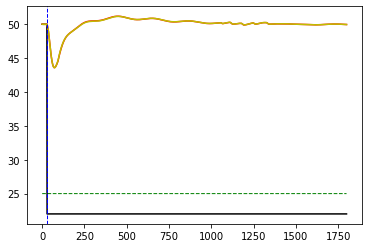

In [4]:
# CZSGW : 증기발생기 수위 저 SETPOINT [0-1]
# ZINST78 : 증기발생기 1LOOP 수위
# ZINST77 : 증기발생기 2LOOP 수위
# ZINST76 : 증기발생기 3LOOP 수위
plt.plot(db['CZSGW']*100, color='g', linestyle='--', linewidth=1)
plt.plot(db['ZINST78'], color='k')
plt.plot(db['ZINST77'], color='r')
plt.plot(db['ZINST76'], color='y')
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

ALARM

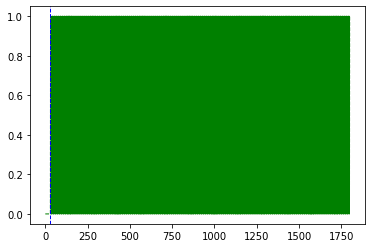

In [3]:
# KLAMPO319': 알람 SG 1,2,3 level lo
plt.plot(db['KLAMPO319'], color='g', linestyle='--', linewidth=1)
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

In [5]:
sg_level = []
for i in range(len(db)):
    if i > 29:
        if db['ZINST78'][i] < db['CZSGW'][i]*100 or db['ZINST77'][i] < db['CZSGW'][i]*100 or db['ZINST76'][i] < db['CZSGW'][i]*100:
            sg_level.append(i+1)
if len(sg_level) == 0:
    print('증상을 만족하지 못했습니다.')
else:
    print(f'최초 해당‘SG WATER LEVEL LOW’경보 발생 시간 : {sg_level[0]}초')

최초 해당‘SG WATER LEVEL LOW’경보 발생 시간 : 31초


### 2.3 해당 ‘SG  LOOP WTR LEVEL LOW-LOW’ 경보 발생(NR 17 %)

ALARM LOGIC

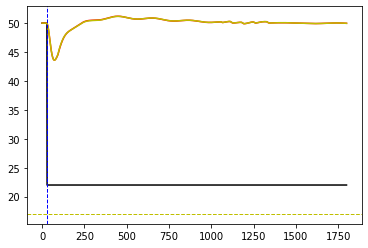

In [8]:
# ZINST78 : 증기발생기 1LOOP 수위
# ZINST77 : 증기발생기 2LOOP 수위
# ZINST76 : 증기발생기 3LOOP 수위
plt.plot(db['ZINST78'], color='k')
plt.plot(db['ZINST77'], color='r')
plt.plot(db['ZINST76'], color='y')
sg_level_low_point = plt.axhline(17, color='y', linestyle='--', linewidth=1) #low-low 기준 17%
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

In [9]:
sg_level_lolo = []
for i in range(len(db)):
    if i > 29:
        if db['ZINST78'][i] < 17 or db['ZINST77'][i] < 17 or db['ZINST76'][i] < 17:
            sg_level_lolo.append(i+1)
if len(sg_level_lolo) == 0:
    print('증상을 만족하지 못했습니다.')
else:
    print(f'최초 해당‘SG WATER LEVEL LOW’경보 발생 시간 : {sg_level_lolo[0]}초')

증상을 만족하지 못했습니다.


### 2.4 해당 SG 상태등에서 ‘STM GEN CH LEVEL LO-LO’ 점등

SG 채널수위 변수 확인필요

### 2.5 증기발생기 수위 DCS Monitor에 해당 증기발생기 ‘LVL CH FAIL’ 경보등 점등 및 Buzzer 울림, 경보 프린터 출력

모니터 변수

### 2.6 해당 SG의 ACS/DCS 제어 선택 스위치가 DCS 제어 Mode로 자동 전환 되지 않았거나 서서히 급수유량 증가가 진행되어 즉시 조치하지 않을 경우 아래 사항 진행됨

제어변수 확인 필요

### 2.6.1 해당 SG MFCV 열림 방향으로 진행 및 해당 SG 실제 급수유량 증가

MFCV OPEN STATE

100     1.2
101     1.2
102     1.2
103     1.2
104     1.2
       ... 
1795    1.2
1796    1.2
1797    1.2
1798    1.2
1799    1.2
Name: BFV478, Length: 1700, dtype: float64


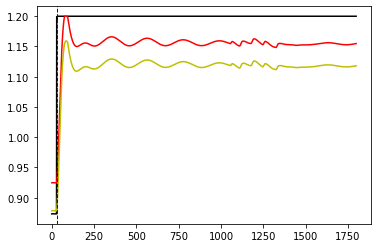

In [60]:
# BFV478 : 주급수 제어밸브1
# BFV488 : 주급수 제어밸브2
# BFV498 : 주급수 제어밸브3
plt.plot(db['BFV478'], color='k')
plt.plot(db['BFV488'], color='r')
plt.plot(db['BFV498'], color='y')
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)
print(db['BFV478'].iloc[100:])

급수 유량

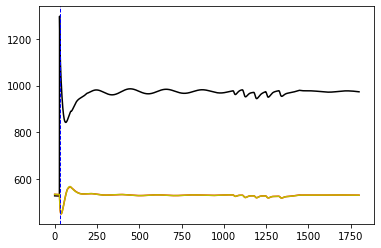

In [65]:
# WFWLN1 : 급수유량1
# WFWLN2 : 급수유량2
# WFWLN3 : 급수유량3
plt.plot(db['WFWLN1'], color='k')
plt.plot(db['WFWLN2'], color='r')
plt.plot(db['WFWLN3'], color='y')
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

In [64]:
valve_flow_state = []
for i in range(len(db)):
    if i > 29:
        sym_ch['BFV478'].append(db['BFV478'][i])
        sym_ch['BFV488'].append(db['BFV488'][i])
        sym_ch['BFV498'].append(db['BFV498'][i])
        sym_ch['WFWLN1'].append(db['WFWLN1'][i])
        sym_ch['WFWLN2'].append(db['WFWLN2'][i])
        sym_ch['WFWLN3'].append(db['WFWLN3'][i])
        if len(sym_ch['BFV478']) == 5:
            if sym_ch['BFV478'][0] < sym_ch['BFV478'][1] < sym_ch['BFV478'][2] or sym_ch['BFV478'][2] >= 1.2:
                if sym_ch['WFWLN1'][0] < sym_ch['WFWLN1'][1] < sym_ch['WFWLN1'][2]: 
                    valve_flow_state.append(i+1)
                
            elif sym_ch['BFV488'][0] < sym_ch['BFV488'][1] < sym_ch['BFV488'][2] or sym_ch['BFV488'][2] >= 1.2:
                if sym_ch['WFWLN2'][0] < sym_ch['WFWLN2'][1] < sym_ch['WFWLN2'][2]: 
                    valve_flow_state.append(i+1)
                    
            elif sym_ch['BFV498'][0] < sym_ch['BFV498'][1] < sym_ch['BFV498'][2] or sym_ch['BFV488'][2] >= 1.2:
                if sym_ch['WFWLN3'][0] < sym_ch['WFWLN3'][1] < sym_ch['WFWLN3'][2]: 
                    valve_flow_state.append(i+1)
if len(valve_flow_state) == 0:
    print('증상을 만족하지 못했습니다.')
else:
    print(f'최초 밸브 열림진행 및 유량 증가 시간 : {valve_flow_state[0]}초')

최초 밸브 열림진행 및 유량 증가 시간 : 71초


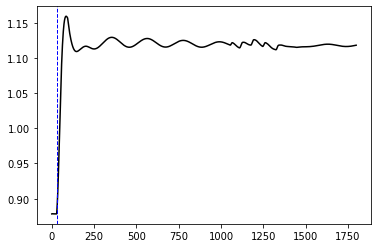

In [16]:
# BFV498 : 주급수 제어밸브
# WFWLN3 : 급수유량
plt.plot(db['BFV498'], color='k')
# plt.plot(db['WFWLN3'], color='r')
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

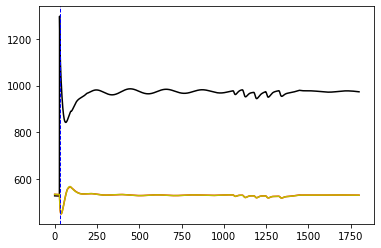

In [10]:
BFV478
BFV488
BFV498
# WFWLN1 : 급수유량 1
# WFWLN2 : 급수유량 2
# WFWLN3 : 급수유량 3
plt.plot(db['WFWLN1'], color='k')
plt.plot(db['WFWLN2'], color='r')
plt.plot(db['WFWLN3'], color='y')
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

In [48]:
import numpy as np
np.shape(sg_mfcv)

(0,)

### 2.6.2 해당 ‘SG STM/FW FLOW DEVIATION’ 경보 발생(±10 %)

ALARM LOGIC

증기 유량

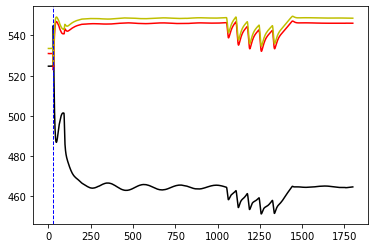

In [69]:
# WSTM1 : 증기 유량1
# WSTM2 : 증기 유량2
# WSTM3 : 증기 유량3
plt.plot(db['WSTM1'], color='k')
plt.plot(db['WSTM2'], color='r')
plt.plot(db['WSTM3'], color='y')
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)
print()

급수 유량

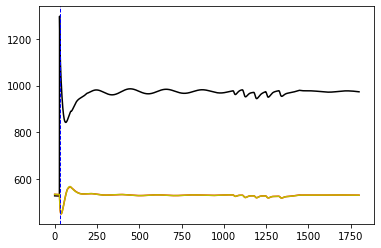

In [68]:
# WFWLN1 : 급수 유량1
# WFWLN2 : 급수 유량2
# WFWLN3 : 급수 유량3
plt.plot(db['WFWLN1'], color='k')
plt.plot(db['WFWLN2'], color='r')
plt.plot(db['WFWLN3'], color='y')
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

ALARM

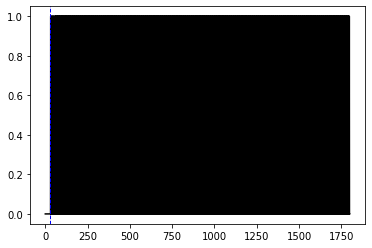

In [70]:
# KLAMPO320 :ALARM: SG 1,2,3 STM/FW FLOW DEVIATION(10% OF LOOP FLOW) 
plt.plot(db['KLAMPO320'], color='k')
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

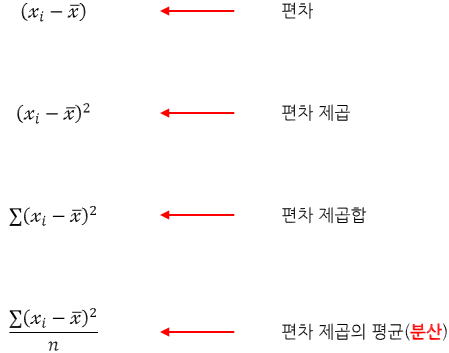

In [74]:
deviation_alarm = []
# deviation setpioint
RSTFWD = {1:db['WSTM1'] * 0.1,
          2: db['WSTM2'] * 0.1,
          3: db['WSTM3'] * 0.1}
for i in range(len(db)):
    if i > 29:
        if abs(db['WSTM1'][i] - db['WFWLN1'][i]) > abs(RSTFWD[1][i]) or abs(db['WSTM2'][i] - db['WFWLN2'][i]) > abs(RSTFWD[2][i]) or abs(db['WSTM3'][i] - db['WFWLN3'][i]) > abs(RSTFWD[3][i]):
            deviation_alarm.append(i+1)
if len(deviation_alarm) == 0:
    print('증상을 만족하지 못했습니다.')
else:
    print(f'최초‘SG STM/FW FLOW DEVIATION’경보 발생(±10 %) 시간 : {deviation_alarm[0]}초')

최초‘SG STM/FW FLOW DEVIATION’경보 발생(±10 %) 시간 : 31초


### 2.6.3 해당 SG 실제 수위 증가

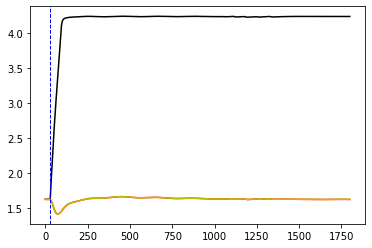

In [78]:
# ZSGN1 : SG 수위1 NARROW RANGE
# ZSGN2 : SG 수위2 NARROW RANGE
# ZSGN3 : SG 수위3 NARROW RANGE
plt.plot(db['ZSGN1'], color='k')
plt.plot(db['ZSGN2'], color='r')
plt.plot(db['ZSGN3'], color='y')
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)


In [80]:
sg_level_state = []
for i in range(len(db)):
    if i > 29:
        sym_ch['ZSGN1'].append(db['ZSGN1'][i])
        sym_ch['ZSGN2'].append(db['ZSGN2'][i])
        sym_ch['ZSGN3'].append(db['ZSGN3'][i])
        if len(sym_ch['ZSGN1']) == 5:
            if sym_ch['ZSGN1'][0] < sym_ch['ZSGN1'][1] < sym_ch['ZSGN1'][2]:
                sg_level_state.append(i+1)
                
            elif sym_ch['ZSGN2'][0] < sym_ch['ZSGN2'][1] < sym_ch['ZSGN2'][2]:
                sg_level_state.append(i+1)
                    
            elif sym_ch['ZSGN3'][0] < sym_ch['ZSGN3'][1] < sym_ch['ZSGN3'][2]:
                sg_level_state.append(i+1)
if len(sg_level_state) == 0:
    print('증상을 만족하지 못했습니다.')
else:
    print(f'최초 증기발생기 수위 증가 시간 : {sg_level_state[0]}초')

최초 증기발생기 수위 증가 시간 : 35초


### 2.6.4 해당 ‘SG WTR LEVELHIGH-HIGH’에 의한 터빈 정지 및 원자로 정지
	발생 가능(※ 원자로 출력 30% 이상에서 터빈 트립 시 P-8 신호 발생)

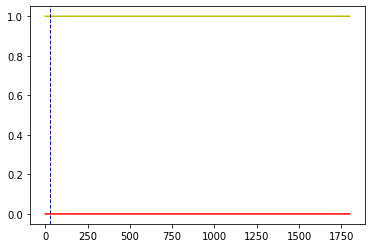

In [81]:
# KLAMPO338 : ALARM: SG 1,2,3 WATER LEVEL HIGH-HIGH TBN TRIP 
# KLAMPO214 : PERMISSIVE SIGNAL, P-8
plt.plot(db['KLAMPO338'], color='r')
plt.plot(db['KLAMPO214'], color='y')
vline = plt.axvline(29, color='b', linestyle='--', linewidth=1)

In [82]:
shutdown = []
for i in range(len(db)):
    if i > 29:
        if db['KLAMPO338'][i] == 1 and db['KLAMPO214'][i] == 1:
            shutdown.append(i+1)
if len(shutdown) == 0:
    print('증상을 만족하지 못했습니다.')
else:
    print(f'최초 "SG WTR LEVELHIGH-HIGH" 에 의한 터빈 정지 및 원자로 정지 시간 : {shutdown[0]}초')

증상을 만족하지 못했습니다.


KLAMPO338은 1번 2번 3번 증기발생기의 수위가 모두 높을 때 발생하는 경보 같습니다.
LOGIC으로 다시 코드 작성이 필요할 것으로 보입니다.

## 4.0 긴급 조치사항

### 4.1 증기발생기 제어반(JP007) 경보창에서 해당 경보 확인

### 4.2 고장난 SG 수위 지시계 확인, 선택된 채널 고장일 경우 아래 절차에 따라 확인 및 조치

### 4.3 해당 SG의 ACS/DCS 제어 선택 스위치(AE-HS478/488/498): ACS → DCS 자동 전환 확인, 전환되지 않았으면 아래 절차에 따라 수동으로 DCS 전환

### 4.3.1 해당 MFCV 제어기(AE-FIK478/488/498)를 자동에서 수동으로 전환

### 4.3.2  해당 MFCV 제어기(AE-FIK478/488/498) 요구신호 변화 없으면 비정상 발생 전 요구신호 값으로 복구하여 SG 수위를 안정시킨 후 수동으로 DCS 전환

### 4.4 모든 SG 수위가 정상 (50±5%)으로 유지되는지 확인

### 4.5 해당 SG 수위 채널 선택스위치(AE-HS478Z/488Z/498Z)를 건전한 채널로 전환 

## 5.0 후속 조치사항